# Ajuste de un modelo de regresion lineal multiple a los datos de peso-edad-presion

## cargando librerias

In [1]:
library(alr4)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.



## cargando datos

In [2]:
peso.edad.presion <- read.table("Peso-Edad-Presion.txt",header=T)


peso.edad.presion
edad <- peso.edad.presion$Edad
presion <- peso.edad.presion$Presion
peso <- peso.edad.presion$Peso

Peso,Edad,Presion
<int>,<int>,<int>
152,50,120
183,20,141
171,20,124
165,30,126
158,30,117
161,50,129
149,60,123
158,50,125
170,40,132


In [3]:
pesoedadpresion <- lm (presion ~ peso + edad)

## Prueba de puntos discrepantes

In [4]:
outlierTest(pesoedadpresion)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
13 2.487277           0.034576      0.44949

# Diagnosticos de influencia

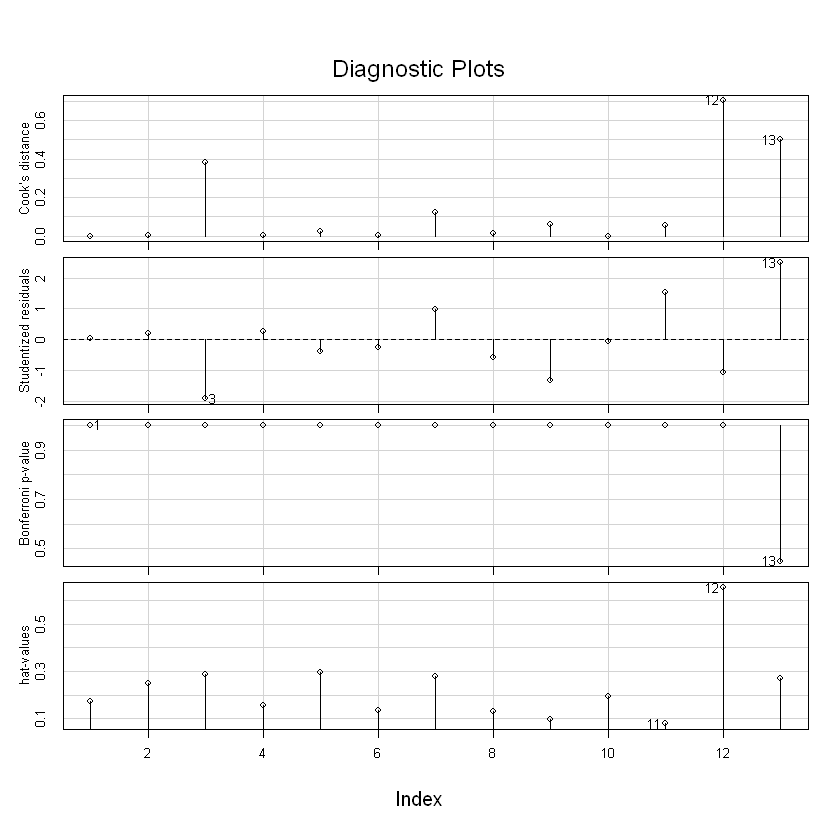

In [5]:
infIndexPlot(pesoedadpresion)

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
3,-1.903618,0.2854012,0.38215821
5,-0.383486,0.2946956,0.02239202
12,-1.066978,0.6529019,0.70406702
13,2.487277,0.2694555,0.50085088


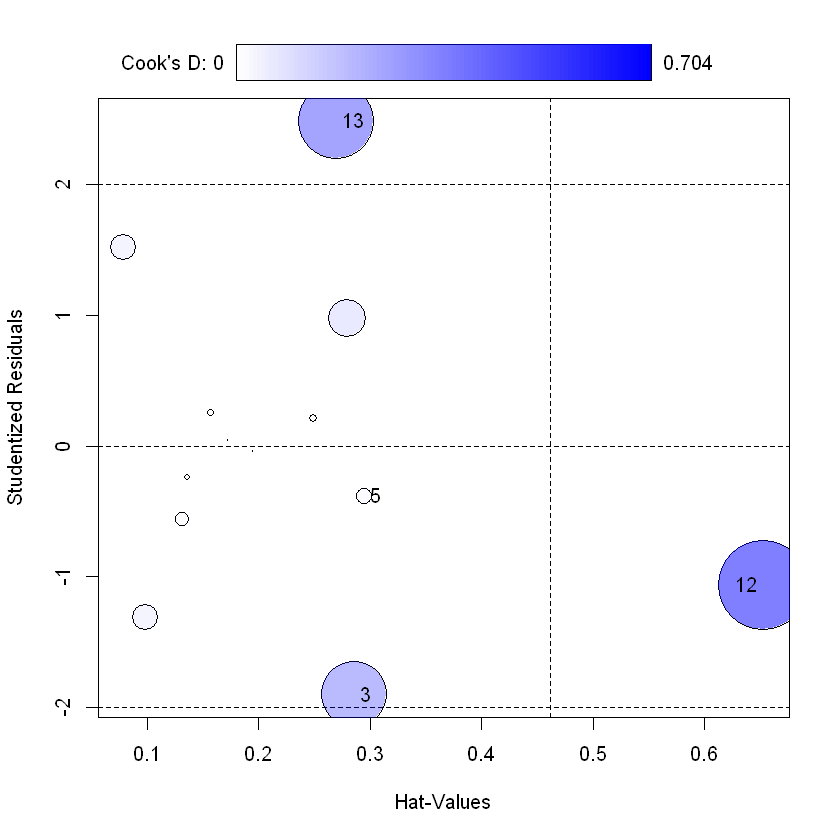

In [6]:
influencePlot(pesoedadpresion)

In [7]:
hatvalues(pesoedadpresion)

1          2          3          4          5          6          7 
0.17274280 0.24907969 0.28540122 0.15651390 0.29469556 0.13598707 0.27942315 
         8          9         10         11         12         13 
0.13124866 0.09826227 0.19516846 0.07911984 0.65290188 0.26945549

In [8]:
cooks.distance(pesoedadpresion)

1            2            3            4            5            6 
0.0001605615 0.0054321999 0.3821582056 0.0044148498 0.0223920186 0.0032944388 
           7            8            9           10           11           12 
0.1241244743 0.0168626715 0.0585372825 0.0001427692 0.0584292409 0.7040670184 
          13 
0.5008508767

In [9]:
pf(cooks.distance(pesoedadpresion), 3, 10)

1            2            3            4            5            6 
3.016021e-06 5.898758e-04 2.318521e-01 4.326998e-04 4.840289e-03 2.792886e-04 
           7            8            9           10           11           12 
5.629056e-02 3.183513e-03 1.962611e-02 2.528908e-06 1.957421e-02 4.289984e-01 
          13 
3.099171e-01

In [10]:
influence(pesoedadpresion, do.coef=TRUE)

,(Intercept),peso,edad
1,0.14520113,-0.0008331730,8.648494e-05
2,-0.25808840,0.0026629634,-3.470332e-03
3,-8.90632947,0.0360844975,6.504543e-02
4,1.08434756,-0.0047918769,-5.982384e-03
5,-3.29831708,0.0157784554,1.507866e-02
6,0.36119512,-0.0014916318,-4.260194e-03
7,0.77394290,-0.0082460848,2.106533e-02
8,-0.01451206,0.0009751480,-6.879448e-03
9,2.65612400,-0.0148463154,-1.154467e-02
10,-0.02689413,0.0002595681,-6.501033e-04


In [11]:
influence.measures(pesoedadpresion)

Influence measures of
	 lm(formula = presion ~ peso + edad) :

      dfb.1_ dfb.peso dfb.edad   dffit cov.r   cook.d    hat inf
1   0.009218  -0.0103  0.00112  0.0208 1.657 0.000161 0.1727    
2  -0.016424   0.0329 -0.04512  0.1214 1.800 0.005432 0.2491    
3  -0.669591   0.5260  0.99904 -1.2030 0.696 0.382158 0.2854    
4   0.069081  -0.0592 -0.07786  0.1096 1.592 0.004415 0.1565    
5  -0.211081   0.1958  0.19714 -0.2479 1.853 0.022392 0.2947    
6   0.023001  -0.0184 -0.05542 -0.0946 1.558 0.003294 0.1360    
7   0.051674  -0.1068  0.28733  0.6089 1.406 0.124124 0.2794    
8  -0.000937   0.0122 -0.09075 -0.2170 1.426 0.016863 0.1312    
9   0.184096  -0.1995 -0.16347 -0.4341 0.898 0.058537 0.0983    
10 -0.001707   0.0032 -0.00843 -0.0196 1.703 0.000143 0.1952    
11  0.078317  -0.0637 -0.01747  0.4452 0.751 0.058429 0.0791    
12  1.342074  -1.3738 -0.99308 -1.4634 2.765 0.704067 0.6529   *
13 -0.373435   0.5719 -0.41450  1.5106 0.391 0.500851 0.2695    

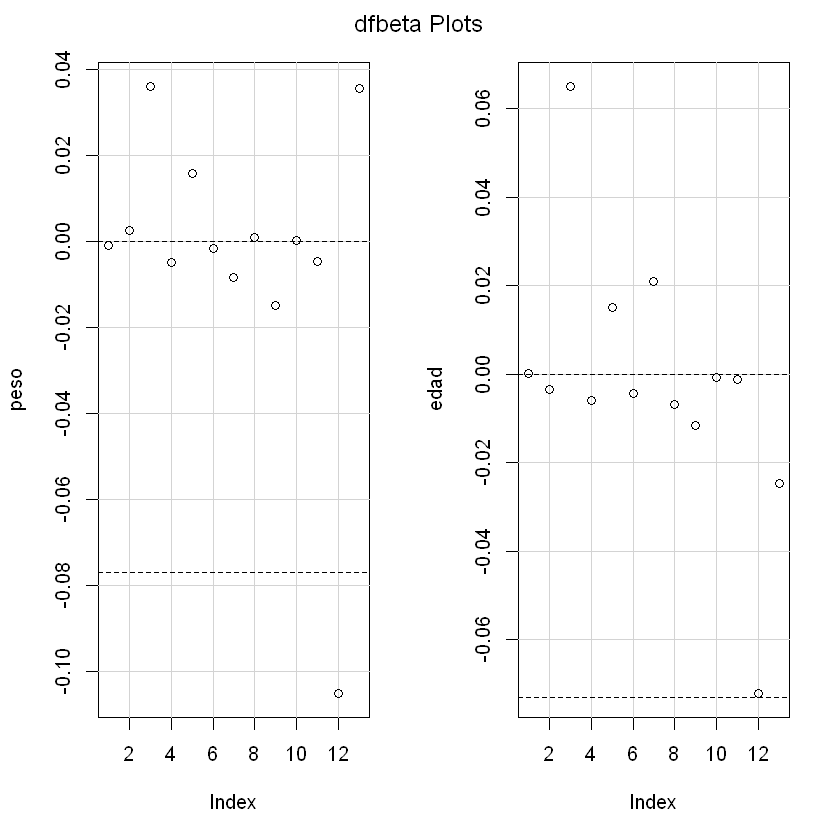

In [12]:
dfbetaPlots( pesoedadpresion )